# AIN313: Machine Learning Lab - Fall 2024
## **Assignment 1**  
#### Instructor: Erkut Erdem
#### TA: Görkem Akyıldız 

**Student Name**: Süleyman Yolcu

**Student ID**: 2210765016

---

# **Part I: Theory Questions**

## **1. k-Nearest Neighbor Classification**

### **Question 1**:   
- *k-NN has a high computational cost. It stores all the training data and performs operations only when a test instance is queried. For example, during testing, kNN needs to calculate the distance between the test point and all the other points in the training set. If the dataset is large, this can become computationally expensive because for each test instance, kNN needs to compute lots of distance calculations.*

### **Question 2**:  
- *The training error graph shows that as the value of k increases, the training error also increases. The test error graph shows an elbow-shaped curve, where the test error is at its lowest when the k value is 11 (which is the elbow point) (odd numbers works better in knn). This k value minimizes the test error while also balancing the trade-off between test errors. Higher k values maybe overfitting the data and lower k values maybe underfitting and failing to generalize the unseen data.*

### **Question 3**:  
**1-NN Decision Boundaries**
- *The answer is below.*

**Classification of point (2,3)**:  
- *According to 1-NN, it will be classified based on its nearest neighbor. The nearest neighbors are (2,4) and (3,3), both at a distance of 1 and both are positive class. Therefore (2,3) would be classified as positive.*
  
**Minimum k for negative classification**:  
- *At k=1 the point is classified as positive. At k=2 the point is also classified as positive. At k=3 even though the point (1,4) is included as a negative class, positive class has the majority. At k=4 there are two possible negative points (1,1) and (3,1) however negative class still does not have the majority. At k=5 the 5 nearest neighbors are +(2,4), +(3,3), -(1,4), -(1,1), -(3,1). Now the majority is negative.*

**Effects of smaller and larger k-values**:  
- *Smaller k-values lead to more variance and sensitivity to noise because the classification is determined by only one neighbor, which might be an outlier. This causes the model to overfit to the training data, as it captures noise and fine details.
  Larger k-values  smooth out the decision boundaries, making the model less sensitive to individual data points. However, if k becomes too large, the model becomes too generalized and may underfit, as it begins to overlook the local patterns in the data in favor of global trends.*


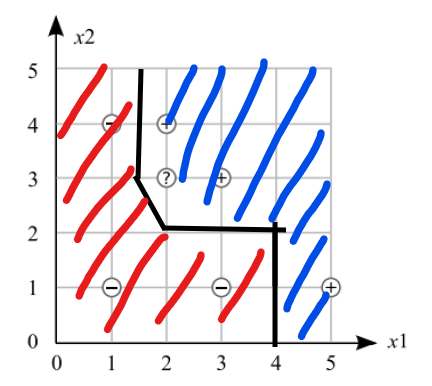

### **Question 4**:  
**Fill in the blanks (True/False)**

| Statement                                                                 | True/False |  
|:---------------------------------------------------------------------------|:-----------|  
| Computational complexity of training is higher than testing in kNN.        | *F*      |  
| Scaling the dataset increases the performance of kNN extraordinarily.      | *T*      |  
| kNN has no idea of the functional form of the problem that it solves.      | *T*      |  
| No difference between Euclidean and Manhattan Distance in kNN.             | *F*      |  



## **2. Linear Regression**

### **Question 1**:  
- **Given model**: \( y = 1.5x + 1.0 \)
- **Data points**: D = {(1.0, 1.5), (1.5, 3.25), (3.0, 4.0)}  
- **Calculate MSE**:  
  -*Model's prediction of the points: ŷ1 = (2.5), ŷ2 = (3,25), ŷ3 = (5.5)*
  
  -*Squared error of the points: Ê1 = 1, Ê2 = 0, Ê3 = 2.25*
  
  -*MSE is the average of the squared points which is 3.25/3 = 1.08333333333*

### **Question 2**:  
**Regression Line and Predictions**  
- **Which is the regression line?**  
  *Line 2 appears to be the best fit line (the actual regression line) because it runs through the majority of the data points and minimizes the distances between the data points and the line.*
  
- **Student comparisons (A, B, C, D)**:  
  *The actual final score for student A is much higher than predicted.The actual final score for student B is slightly lower than predicted. Line 2 correctly predicted the final score for student C. The actual final score for student D is slightly higher than predicted.*

- **Predictions without midterm score**:  
  *Without information on a student’s midterm score, the best prediction would be the mean of all final exam scores.*

### **Question 3**:  
-  *The vertical offsets are the ones used in the least squares line fit in standard linear regression.Vertical offsets measure the difference between the actual values (the points on the graph) and the values predicted by the regression line, vertically.This is the standard method used in linear regression because it measures the error between the predicted and actual values of the dependent variable (y-axis), which is what we want to minimize.*


### **Question 4**:  
**Closed Form Solution for Linear Regression**  


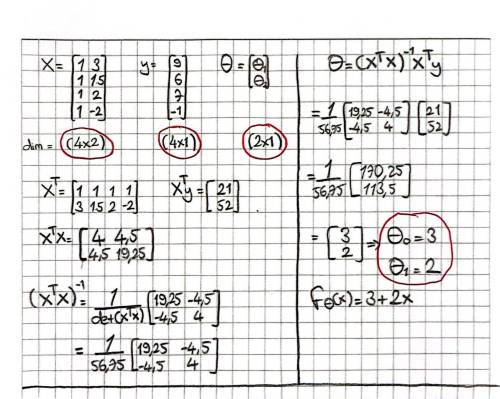

### **Question 5**:  
**Feature Scaling in Logistic Regression**  
- Feature scaling is important in logistic regression because it makes the training process more efficient and accurate. When your data features have very different scales—like one feature ranges from 1 to 1,000 while another ranges from 0 to 1—it can cause the algorithm to have trouble finding the best solution. Scaling the features so they're all in a similar range helps the algorithm work better by ensuring that no single feature dominates just because it has larger values. This means the model can learn faster and make better predictions because all features contribute equally to the outcome.


---

# **Part II: Telecommunication Customer Classification**

<span style="color: orange;">Throughout the notebook I will be explaining my reasoning with orange colored texts using active voice.</span>

<span style="color: orange;">I have 5 steps: 1-Import and Visualize, 2-Split and Preprocess, 3-kNN Algortihms, 4-Experiments , 5-Conclusion.</span>

## Step 1: Import and Visualize

<span style="color: orange;">In this step I just wanted to understand the dataset and data distributions.</span>

In [12]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score

### Basic Overview of Dataset
- **Rows**: 1,000 entries
- **Columns**: 12 features

### Column Details
1. **district**: Represents a district code (integer).
2. **customer_since**: Number of years the customer has been with the service (integer).
3. **age**: Age of the customer (integer).
4. **is_married**: Whether the customer is married or not (categorical, 'Yes' or 'No').
5. **address**: Number of years at the current address (integer).
6. **salary**: Salary of the customer (float).
7. **ed**: Education level represented by a numerical code (integer).
8. **employment_status**: Code representing employment status (integer).
9. **is_retired**: Whether the customer is retired or not (categorical, 'Yes' or 'No').
10. **gender**: Gender of the customer (categorical, 'M' or 'F').
11. **reside**: Number of people residing at the customer's address (?) (integer).
12. **service**: Type of service subscribed by the customer (categorical, ”Fundamental
Service”, ”E-Service”, ”Advanced Service”, ”Complete Service”).


In [15]:
# Load the dataset
file_path = 'telecommunicaton_classification.csv'
df = pd.read_csv(file_path)
df.head()

,district,customer_since,age,is_married,address,salary,ed,employment_status,is_retired,gender,reside,service
0,2,13,44,Yes,9,64.0,4,5,No,F,2,Fundamental Service
1,3,11,33,Yes,7,136.0,5,5,No,F,6,Complete Service
2,3,68,52,Yes,24,116.0,1,29,No,M,2,Advanced Service
3,2,33,33,No,12,33.0,2,0,No,M,1,Fundamental Service
4,2,23,30,Yes,9,30.0,1,2,No,F,4,Advanced Service


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district           1000 non-null   int64  
 1   customer_since     1000 non-null   int64  
 2   age                1000 non-null   int64  
 3   is_married         1000 non-null   object 
 4   address            1000 non-null   int64  
 5   salary             1000 non-null   float64
 6   ed                 1000 non-null   int64  
 7   employment_status  1000 non-null   int64  
 8   is_retired         1000 non-null   object 
 9   gender             1000 non-null   object 
 10  reside             1000 non-null   int64  
 11  service            1000 non-null   object 
dtypes: float64(1), int64(7), object(4)
memory usage: 93.9+ KB


### Distribution of Classes in the Telecommunication Dataset
- **The distribution among the service types is fairly balanced, with each category representing a significant portion of the dataset.**

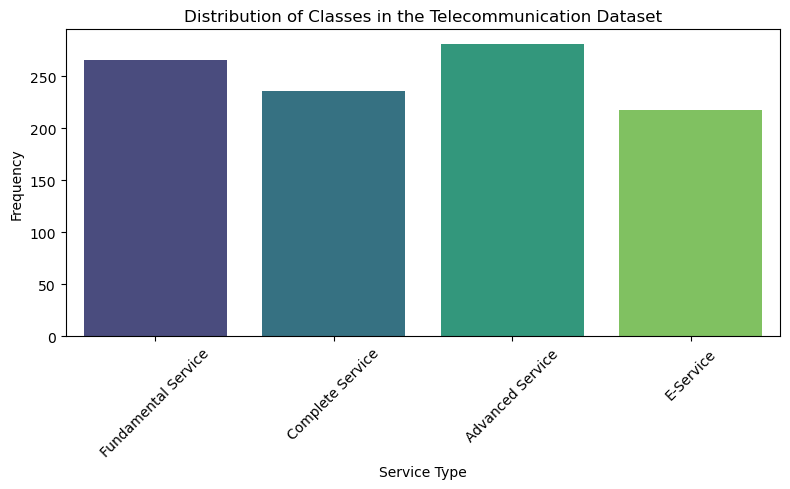

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='service', hue='service', palette='viridis', dodge=False, legend=False)
plt.title('Distribution of Classes in the Telecommunication Dataset')
plt.xlabel('Service Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribution of Numerical Features
<span style="color: orange;">Salary feature was heavily right-skewed caused by outliers, so I explained it in the next part.</span>

1. **customer_since**: The distribution is fairly uniform.

2. **age**: The distribution is roughly bell-shaped, peaking around 30-40 years, indicating that most customers fall within this age range.

3. **address**: The data is right-skewed.

4. **employment_status**: It is also right-skewed, suggesting that many customers have lower employment status values, while a few have higher values.


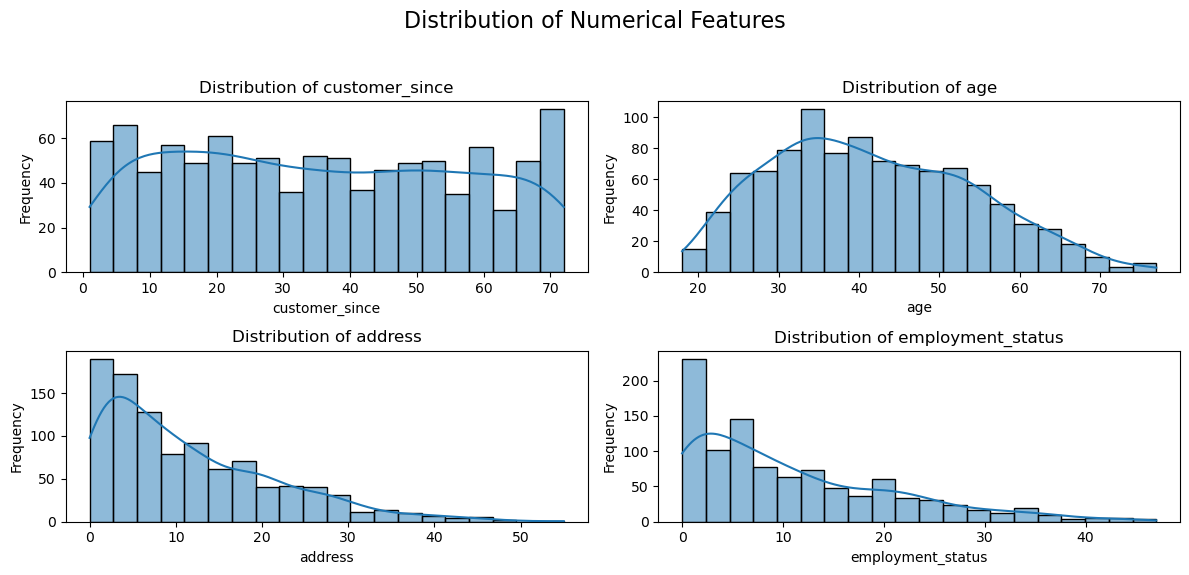

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

num_features = ['customer_since', 'age', 'address', 'employment_status']

for ax, feature in zip(axes.flatten(), num_features):
    sns.histplot(df[feature], bins=20, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Average Salary by Service Type
- The plot shows a positive correlation between **average salary** and **service type**. People with higher salaries tend to use **Advanced** and **Complete Services**, while those with lower salaries tend to use **Fundamental Services**.

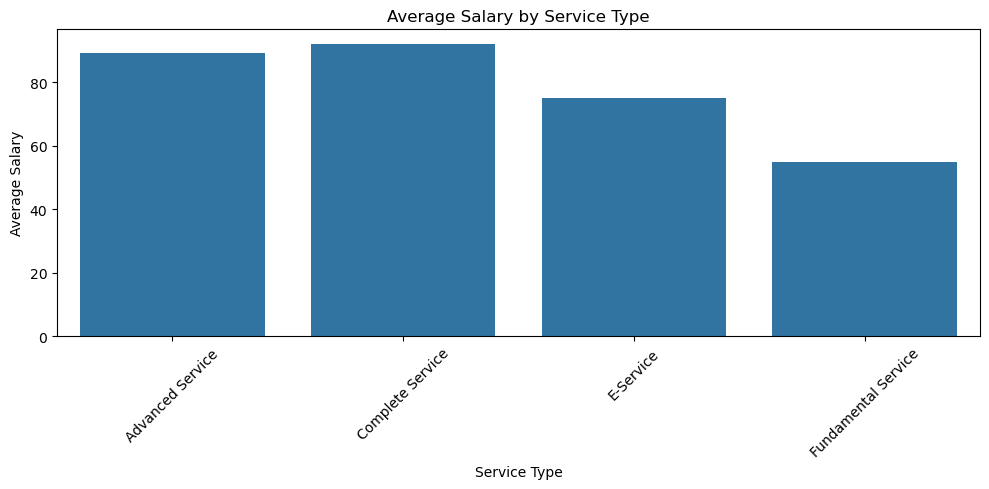

In [22]:
avg_salary_per_service = df.groupby('service')['salary'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=avg_salary_per_service, x='service', y='salary')
plt.title('Average Salary by Service Type')
plt.xlabel('Service Type')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribution of Categorical Features

1. **district**: The distribution is fairly balanced across three district categories, with each having a similar number of observations.

2. **is_married**: The counts are also quite balanced.

3. **is_retired**: The vast majority of customers are not retired, indicating a skewed distribution toward non-retirees.

4. **gender**: There is an almost equal distribution between male and female customers, suggesting no significant gender bias in the dataset.

<span style="color: orange;">This might indicate that is_retired feature might not be beneficial for our purposes.</span>

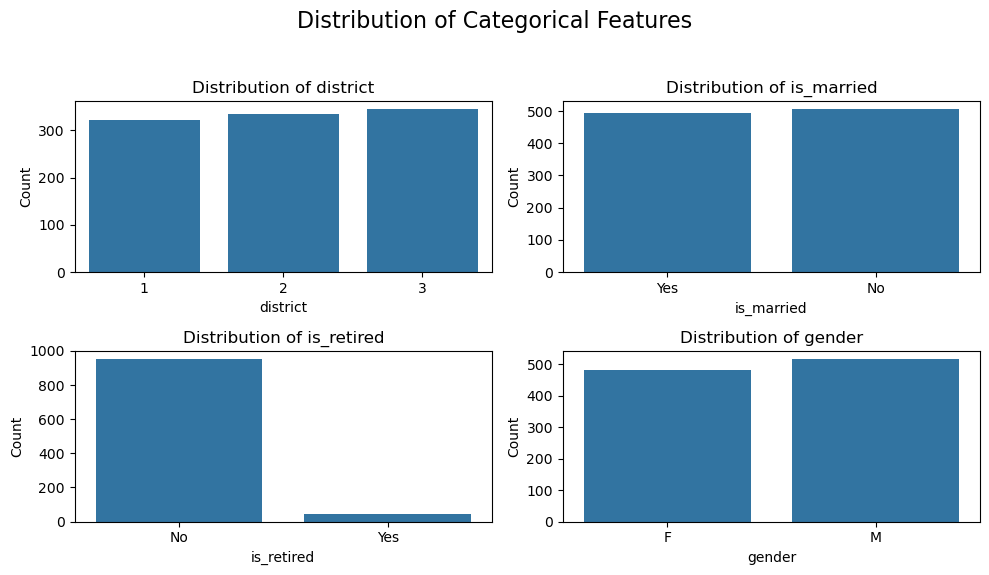

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('Distribution of Categorical Features', fontsize=16)

cat_features = ['district', 'is_married', 'is_retired', 'gender']

for ax, feature in zip(axes.flatten(), cat_features):
    sns.countplot(data=df, x=feature, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Relationship between Customer Duration and Service Type
- The plot shows a **positive** correlation between customer duration and service type. Customers using **Complete** or **Advanced** Services generally have **longer** durations compared to those using **Fundamental** Services. This suggests that more comprehensive services might encourage longer customer retention.

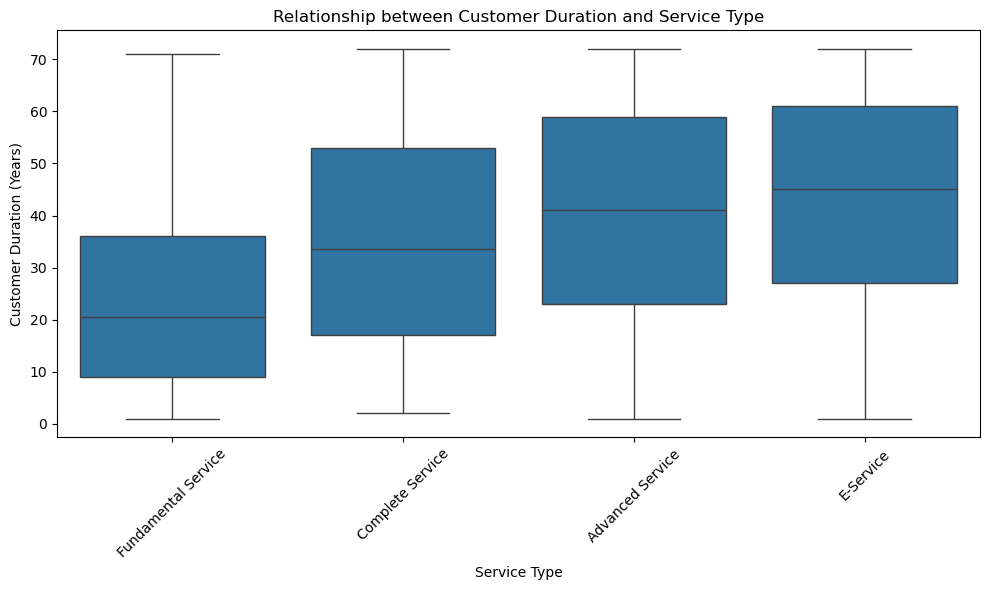

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='service', y='customer_since')
plt.title('Relationship between Customer Duration and Service Type')
plt.xlabel('Service Type')
plt.ylabel('Customer Duration (Years)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation Analysis
- A correlation matrix to identify features that have strong relationships with the target variable.
- Features with low correlation to the target might be less important.
- **Strong Positive Correlations:**
   - **`age` and `address` (0.6):** These two variables have a relatively strong positive correlation, suggesting that as age increases, address changes (potentially indicating residence duration) also increase.
   - **`age` and `employment_status` (0.6):** This correlation is fairly high, indicating that employment status is more strongly related to age compared to other variables.
   - **`customer_since` and `employment_status` (0.5):** There is a moderate positive correlation here, implying that longer customer tenure might be associated with a particular employment status.
- **Very Low Correlations:**
    - **Features with very low correlation (like `district`, `gender`, and `is_retired`) could be candidates for elimination for the eliminated dataset.**

service              1.000000
ed                   0.193864
customer_since       0.166691
salary               0.134525
employment_status    0.110011
is_married_Yes       0.083836
reside               0.082022
address              0.067913
age                  0.056909
is_retired_Yes       0.008908
gender_M            -0.004966
district            -0.023771
Name: service, dtype: float64


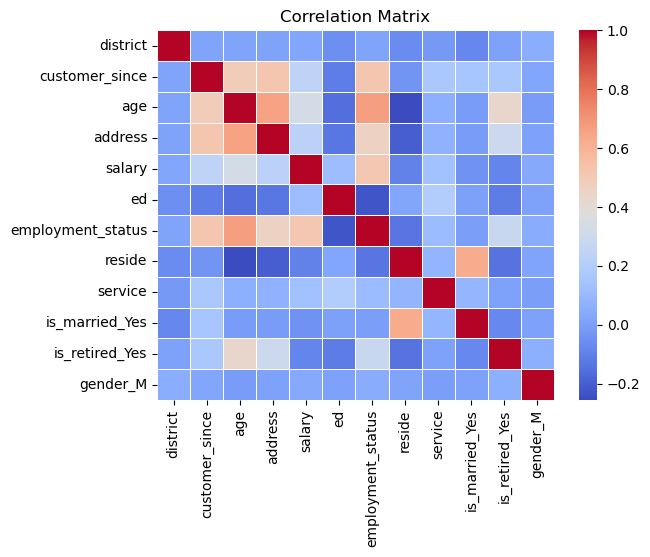

In [28]:
df_encoded = pd.get_dummies(df, columns=['is_married', 'is_retired', 'gender'], drop_first=True)
service_mapping = {
    'Fundamental Service': 0,
    'E-Service': 1,
    'Advanced Service': 2,
    'Complete Service': 3
}
df_encoded['service'] = df_encoded['service'].map(service_mapping)
correlation_matrix = df_encoded.corr()
correlation_with_target = correlation_matrix['service'].sort_values(ascending=False)
print(correlation_with_target)
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Step 2: Split and Preprocess 
<span style="color: orange;">I wanted to observe how data preproccessing affects the kNN algorithm so I prepared the datasets beforehand in order to use in the experiments step.</span>

In this step, three different types of datasets prepared to test the KNN algorithm:
 
1. **Raw Data**:
    - Focused on encoding the categorical features using one-hot encoding.
    - This allows the KNN algorithm to interpret categorical variables without applying any scaling or normalization.
    - This version helps to understand the baseline performance of the model using unscaled features.
 
2. **Scaled Data**:
    - After encoding the categorical features, Min-Max normalization applied to the numerical features.
    - This transformation scales the values between 0 and 1, which helps KNN by reducing the influence of larger numerical ranges.
    - The purpose here is to observe the impact of normalization on the model's performance and how it handles features on different scales.
 
3. **Eliminated Data**:
    - In addition to encoding categorical variables and normalizing numerical features, certain features removed according to the correlation analysis that might not contribute significantly to the KNN algorithm's performance.
    - The purpose here is to observe the impact of decreasing the dimension and making the model less complex.
    
Finally, each dataset splitted into training and testing sets (80% train, 20% test) to ensure a fair comparison of KNN's performance across the three variations.


In [31]:
# Splitting data into features and target
X = df.drop('service', axis=1)
y = df['service']

# --- Min-Max Normalization Function ---
def min_max_normalize(df, columns):
    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()
        range_val = max_val - min_val
        if range_val != 0:
            df[col] = (df[col] - min_val) / range_val
        else:
            df[col] = 0  
    return df

# --- Preparing the datasets ---

# 1. Raw Data: One-Hot Encoding for 'is_married', 'is_retired', 'gender'
X_raw = pd.get_dummies(X.copy(), columns=['district','is_married', 'is_retired', 'gender'])
X_raw = X_raw.astype(float)

# 2. Scaled Data: One-Hot Encoding + Normalization
X_scaled = pd.get_dummies(X.copy(), columns=['district','is_married', 'is_retired', 'gender'])
X_scaled = min_max_normalize(X_scaled, ['customer_since', 'age', 'address', 'salary', 'ed', 'employment_status'])
X_scaled = X_scaled.astype(float)

# 3. Eliminated Data: Removing 'district', 'is_retired', 'gender' from data
X_eliminated = X.copy().drop(['is_retired', 'gender', 'district'], axis=1)
X_eliminated = pd.get_dummies(X_eliminated, columns=['is_married'])
X_eliminated = min_max_normalize(X_eliminated, ['customer_since', 'age', 'address', 'salary', 'ed', 'employment_status'])
X_eliminated = X_eliminated.astype(float)

# Splitting each dataset into train-test sets (80% train, 20% test)
X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_eliminated_train, X_eliminated_test, y_eliminated_train, y_eliminated_test = train_test_split(X_eliminated, y, test_size=0.2, random_state=42)

# Dataset names and data splits
datasets = [
    ('Raw Data', X_raw_train.values, y_raw_train.values, X_raw_test.values, y_raw_test.values),
    ('Scaled Data', X_scaled_train.values, y_scaled_train.values, X_scaled_test.values, y_scaled_test.values),
    ('Eliminated Data', X_eliminated_train.values, y_eliminated_train.values, X_eliminated_test.values, y_eliminated_test.values)
]

## Step 3: kNN Algorithms
<span style="color: orange;">I wanted to observe the strenghts of different kNN approaches so I implemented the algortihms beforehand in order to use it in the experiments step.</span>

### Implementing different optimized variations of the k-Nearest Neighbors (kNN) algorithm:
 
The purpose of this step is to explore how different weighting strategies affect 
 the prediction performance of the kNN algorithm. Four variations of kNN are implemented:

1. **Simple kNN (knn1)**:
- This is the standard kNN approach.
- It calculates the Euclidean distance between each test point and all training points.
- The k-nearest neighbors are identified, and the majority class among these neighbors 
      determines the predicted class.
- This method uses a simple majority voting mechanism without any weighting.


2. **Weighted kNN with Inverse Distance (knn2)**:
- This variation incorporates distance-based weighting.
- After finding the k-nearest neighbors, it assigns weights to each neighbor based on 
      the inverse of the distance to the test point.
- Neighbors closer to the test point have higher influence (weight), making this 
      approach more sensitive to nearby points.
- The class with the highest weighted vote is chosen as the predicted class.


3. **Weighted kNN with Class Occurrence Weights (knn3)**:
- In this approach, each neighbor's vote is weighted based on the occurrence frequency 
      of its class in the training set.
- Less frequent classes are given higher weights to address class imbalance in the data.
- This variant aims to balance the influence of underrepresented classes, making it 
      suitable for imbalanced datasets.
- The final prediction is based on the class with the highest weighted vote.


4. **Combination of Distance and Class Occurrence Weights (knn4)**:
- This method combines both inverse distance weights and class occurrence weights to 
      determine the final vote.
- It multiplies the distance-based weight by the class occurrence weight for each neighbor.
- This approach balances the influence of distance and class imbalance, providing a more 
      refined prediction mechanism.
- The predicted class is the one with the highest combined weight among the k-nearest neighbors.

Each variation aims to improve the robustness of kNN by incorporating different weighting strategies to enhance the predictive accuracy, especially in cases with imbalanced classes or varying distance scales.


In [34]:
# Optimized kNN1: Simple kNN
def knn1(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        # Calculate distances 
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        # Get the indices of the k-nearest neighbors
        nearest_indices = distances.argsort()[:k]
        # Get the classes of the k-nearest neighbors
        nearest_labels = y_train[nearest_indices]
        # Predict the class with the most occurrences
        labels, counts = np.unique(nearest_labels, return_counts=True)
        most_common = labels[np.argmax(counts)]
        y_pred.append(most_common)
    return np.array(y_pred)

# Optimized kNN2: Weighted kNN (inverse distance)
def knn2(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        # Calculate distances
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        # Get the indices of the k-nearest neighbors
        nearest_indices = distances.argsort()[:k]
        # Get the classes of the k-nearest neighbors
        nearest_labels = y_train[nearest_indices]
        nearest_distances = distances[nearest_indices]
        # Calculate weights (inverse distance)
        weights = 1 / (nearest_distances + 1e-5)
        # Weighted majority vote
        unique_labels = np.unique(nearest_labels)
        weighted_counts = np.zeros(len(unique_labels))
        for i, label in enumerate(unique_labels):
            weighted_counts[i] = weights[nearest_labels == label].sum()
        y_pred.append(unique_labels[np.argmax(weighted_counts)])
    return np.array(y_pred)

# Optimized kNN3: Weighted kNN 
def knn3(X_train, y_train, X_test, k):
    # Calculate class occurrence weights
    classes, class_counts = np.unique(y_train, return_counts=True)
    class_weights = {cls: 1 / count for cls, count in zip(classes, class_counts)}
    y_pred = []
    for test_point in X_test:
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        nearest_indices = distances.argsort()[:k]
        nearest_labels = y_train[nearest_indices]
        # Calculate weights based on class occurrence
        weights = np.array([class_weights[label] for label in nearest_labels])
        # Weighted majority vote
        unique_labels = np.unique(nearest_labels)
        weighted_counts = np.zeros(len(unique_labels))
        for i, label in enumerate(unique_labels):
            weighted_counts[i] = weights[nearest_labels == label].sum()
        y_pred.append(unique_labels[np.argmax(weighted_counts)])
    return np.array(y_pred)

# Optimized kNN4: Combination of distance and class occurrence weights
def knn4(X_train, y_train, X_test, k):
    # Calculate class occurrence weights
    classes, class_counts = np.unique(y_train, return_counts=True)
    class_occurrence_weights = {cls: 1 / count for cls, count in zip(classes, class_counts)}
    y_pred = []
    for test_point in X_test:
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        nearest_indices = distances.argsort()[:k]
        nearest_labels = y_train[nearest_indices]
        nearest_distances = distances[nearest_indices]
        # Calculate combined weights (distance + occurrence)
        distance_weights = 1 / (nearest_distances + 1e-5)
        occurrence_weights = np.array([class_occurrence_weights[label] for label in nearest_labels])
        combined_weights = distance_weights * occurrence_weights
        # Weighted majority vote
        unique_labels = np.unique(nearest_labels)
        weighted_counts = np.zeros(len(unique_labels))
        for i, label in enumerate(unique_labels):
            weighted_counts[i] = combined_weights[nearest_labels == label].sum()
        y_pred.append(unique_labels[np.argmax(weighted_counts)])
    return np.array(y_pred)
    
knn_variants = [
    ('Simple kNN', knn1),
    ('Weighted kNN (Inverse Distance)', knn2),
    ('Weighted kNN (Inverse Occurrence)', knn3),
    ('Combined Weighted kNN', knn4)
]


## Step 4: Experiments

### After implementing the datasets and the algorithms a set of experiments will be conducted in order to show strenghts and weaknesses of the kNN algorithm
-Experiment 1 : Finding the best k value 

-Experiment 2 : Comparison of the datasets using simple kNN algortihm in order to show how normalization and feature selection affects kNN algorithm.

-Experiment 3 : Comparison of the different kNN algorithms using the same dataset, in order to show how different approaches affects the overall performance of the kNN algorithm.

-Experiment 4: Analyzing Distance Metrics

## Helper functions in experiments

In [38]:
def evaluate_knn(X_train, y_train, X_test, y_test, knn_func, k):
    y_pred = knn_func(X_train, y_train, X_test, k)
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred, average='weighted', zero_division=0) * 100, 2)
    recall = round(recall_score(y_test, y_pred, average='weighted', zero_division=0) * 100, 2)
    return accuracy, precision, recall
    
def find_best_k(X_train, y_train, X_test, y_test, knn_algo, odd_k_values=range(1, 27, 2)):
    test_errors = []
    for k in odd_k_values:
        y_pred = knn_algo(X_train, y_train, X_test, k)
        test_error = np.mean(y_pred != y_test)
        test_errors.append(test_error)
    
    plt.figure(figsize=(8, 5))
    plt.plot(odd_k_values, test_errors, marker='o', linestyle='-', color='g')
    plt.title('Test Error vs. k in k-NN')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Test Error')
    plt.xticks(odd_k_values)
    plt.show()
    

### Experiment 1: Finding the best k value using preprocessed dataset
<span style="color: orange;">In this experiment my main focus was finding a good k value in order to be used in later experiments.</span>

1. **Analyzing the Test Error Curve**
    - High test error at low k values: Low values of k (e.g., 1 or 3) lead to high variance and overfitting, as the model might be sensitive to noise in the data.
    - Low test error at optimal k values: There’s a sweet spot around k=5 and k=7 where the model achieves the lowest test error, indicating an optimal balance between bias and variance.
    - High test error at high k values: As k increases (e.g., beyond 13), the model becomes too biased, underfitting the data and failing to capture the nuances of class boundaries.
2. **Odd k values**
    - Odd values of k were chosen to avoid ties when making predictions. In classification tasks with multiple classes, ties can lead to ambiguous results, making odd values more reliable.

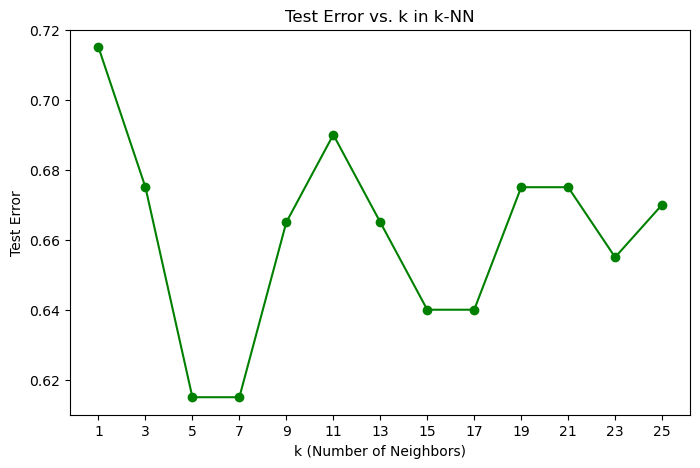

In [41]:
find_best_k(X_eliminated_train.values, y_eliminated_train.values, X_eliminated_test.values, y_eliminated_test.values, knn1)

### Experiment 2: Comparison of Datasets Using Simple kNN
<span style="color: orange;">In this experiment I wanted to observe the performance of simple kNN algortihm on different types of datasets to see how will kNN react to unprocessed data and outliers. My independent variable was three types of datasets: raw, scaled and eliminated. I used the same algortihm with the same k value for all the datasets.</span>

1. **Impact of Preprocessing on kNN Performance**:
- The initial performance of the kNN algorithm on the raw data was relatively low, with accuracy, precision, and recall all around `32%`. This reflects the challenges of using unprocessed data where numerical features might have varying scales, making it difficult for the kNN algorithm to weigh the features effectively.
   
2. **Effect of Min-Max Normalization (Scaled Data)**:
- After applying min-max normalization, the accuracy, precision, and recall improved to around `36.5%`. This step ensured that all numerical features had the same scale, making it easier for the kNN algorithm to treat them equally. By reducing the impact of outliers and differences in scale, normalization helps in achieving better overall results.

3. **Feature Elimination (Eliminated Data)**:
- Further improvement was observed when less important features—like `'is_retired'`, `'gender'`, and `'district'`—were removed. This dimensionality reduction increased accuracy, precision, and recall to `38.5%`. Eliminating features that may not contribute much to the prediction task often helps in avoiding overfitting and enhancing the model's generalization.

This experiment demonstrates the importance of data preprocessing in improving kNN performance, with both normalization and feature elimination playing key roles.

In [44]:
performance_metrics = []

for dataset_name, X_train, y_train, X_test, y_test in datasets:
    accuracy, precision, recall = evaluate_knn(X_train, y_train, X_test, y_test, knn1, 7)
    print(f"{dataset_name} Results:\n"
    f"  Accuracy:  {accuracy:.2f}%\n"
    f"  Precision: {precision:.2f}%\n"
    f"  Recall:    {recall:.2f}%")

    performance_metrics.append({
        'Dataset': dataset_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    })

Raw Data Results:
  Accuracy:  32.00%
  Precision: 31.81%
  Recall:    32.00%
Scaled Data Results:
  Accuracy:  36.50%
  Precision: 36.78%
  Recall:    36.50%
Eliminated Data Results:
  Accuracy:  38.50%
  Precision: 38.53%
  Recall:    38.50%


<span style="color: orange;">The results clearly indicate that scaling the dataset improved the performance significantly. Scaling lowered the impact of outliers that I observed on 'salary' feature. Addition to scaling, eliminating unnecessary features also improved the performance incredibly. Reducing the dimensions helped kNN algortihm to achieve better results. </span>

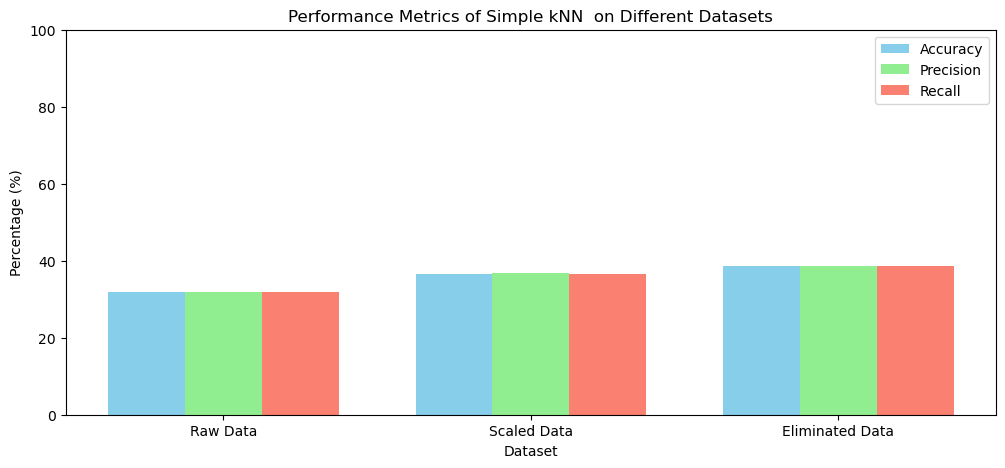

In [46]:
datasets_names = [metrics['Dataset'] for metrics in performance_metrics]
accuracies = [metrics['Accuracy'] for metrics in performance_metrics]
precisions = [metrics['Precision'] for metrics in performance_metrics]
recalls = [metrics['Recall'] for metrics in performance_metrics]

bar_width = 0.25
index = np.arange(len(datasets_names))

plt.figure(figsize=(12, 5))
plt.bar(index, accuracies, bar_width, label='Accuracy', color='skyblue')
plt.bar(index + bar_width, precisions, bar_width, label='Precision', color='lightgreen')
plt.bar(index + 2 * bar_width, recalls, bar_width, label='Recall', color='salmon')
plt.xlabel('Dataset')
plt.ylabel('Percentage (%)')
plt.title(f'Performance Metrics of Simple kNN  on Different Datasets')
plt.xticks(index + bar_width, datasets_names)
plt.ylim(0, 100)
plt.legend()

### Experiment 3: Comparison of Different kNN Approaches
<span style="color: orange;">In this experiment my main focus was how different approaches of kNN algortihms can handle with unprocessed datasets. I wanted to observe the performances of different kNN algortihms in the presence of outliers, unbalance issues and other types of noise.</span>

1. **Simple kNN Performance**:
- The baseline performance with a simple kNN algorithm was around `32%` for accuracy, precision, and recall. Without any weighting mechanism, simple kNN considers all neighbors equally, which can make it more susceptible to the influence of outliers and distant points.

2. **Weighted kNN (Inverse Distance)**:
- By assigning weights inversely proportional to the distance of the neighbors, the accuracy, precision, and recall improved to `33%`. This method reduces the impact of outliers and distant points by giving more importance to closer neighbors, making the model more robust and improving classification performance.

3. **Weighted kNN (Inverse Occurrence)**:
- The accuracy further increased to `34%` when using weights based on the inverse occurrence of classes. This approach places more emphasis on less frequent classes, helping the model handle class imbalance better, which can be beneficial in multiclass classification tasks.

4. **Combined Weighted kNN**:
- The best results were obtained by combining the two weighting strategies, achieving an accuracy of `35%`. This combined approach leverages both the advantages of handling outliers and giving more significance to rare classes, leading to a more balanced and improved performance across all metrics.

This experiment effectively demonstrates how different weighting strategies in kNN can improve its performance by addressing various aspects like distance sensitivity and class imbalance.

In [49]:
performance_metrics = []

for knn_name, knn_func in knn_variants:
    accuracy, precision, recall = evaluate_knn(X_raw_train.values, y_raw_train.values, X_raw_test.values, y_raw_test.values, 
                                               knn_func, 7)
    print(f"{knn_name} Results:\n"
    f"  Accuracy:  {accuracy:.2f}%\n"
    f"  Precision: {precision:.2f}%\n"
    f"  Recall:    {recall:.2f}%")
    performance_metrics.append({
        'Algorithm': knn_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    })

Simple kNN Results:
  Accuracy:  32.00%
  Precision: 31.81%
  Recall:    32.00%
Weighted kNN (Inverse Distance) Results:
  Accuracy:  33.00%
  Precision: 32.77%
  Recall:    33.00%
Weighted kNN (Inverse Occurrence) Results:
  Accuracy:  34.00%
  Precision: 34.02%
  Recall:    34.00%
Combined Weighted kNN Results:
  Accuracy:  35.00%
  Precision: 35.14%
  Recall:    35.00%


<span style="color: orange;">Results clearly indicate that weighted kNN approaches can improve the performance significantly. Assigning weights inversely to distance gave closer points more importance, thus reducing the error caused by outliers. When we assigned the weights inversely to class occurence and combine both approaches we got the best results.</span>

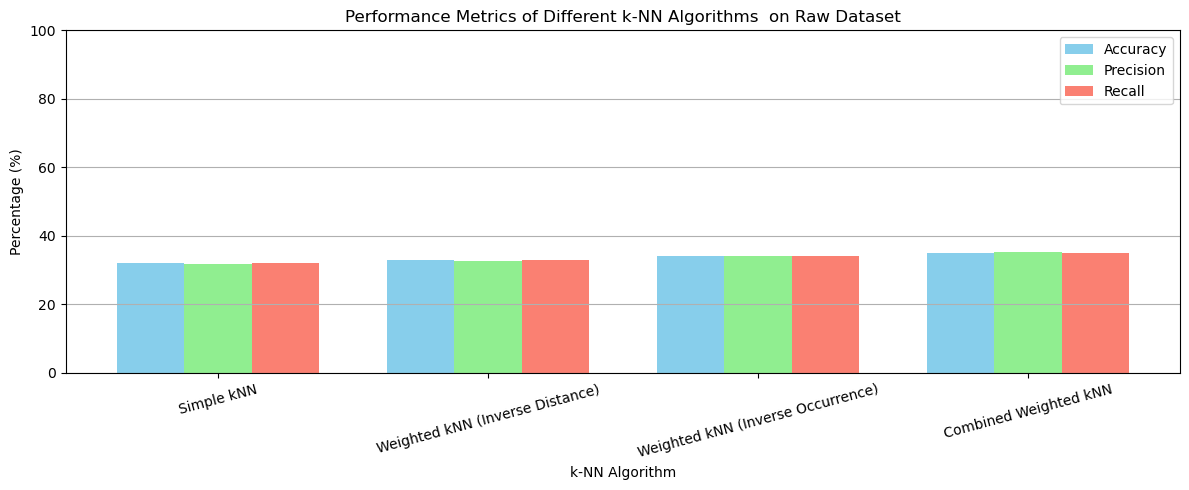

In [51]:
algorithms = [metrics['Algorithm'] for metrics in performance_metrics]
accuracies = [metrics['Accuracy'] for metrics in performance_metrics]
precisions = [metrics['Precision'] for metrics in performance_metrics]
recalls = [metrics['Recall'] for metrics in performance_metrics]

bar_width = 0.25
index = np.arange(len(algorithms))

plt.figure(figsize=(12, 5))
plt.bar(index, accuracies, bar_width, label='Accuracy', color='skyblue')
plt.bar(index + bar_width, precisions, bar_width, label='Precision', color='lightgreen')
plt.bar(index + 2 * bar_width, recalls, bar_width, label='Recall', color='salmon')
plt.xlabel('k-NN Algorithm')
plt.ylabel('Percentage (%)')
plt.title(f'Performance Metrics of Different k-NN Algorithms  on Raw Dataset')
plt.xticks(index + bar_width, algorithms, rotation=15)
plt.ylim(0, 100)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Experiment 4: Analyzing Distance Metrics
<span style="color: orange;">We generally use euclidean distance in knn algortihms. In this experiment I wanted to see the effects of different distance metrics. </span>

1. **Accuracy, Precision, and Recall Analysis**
- **Euclidean Distance:** 
    - Achieved the highest performance across accuracy (38.5%), precision (39.15%), and recall (38.5%).
    - This indicates that the Euclidean metric effectively captures the geometric relationships in the dataset, making it suitable for this specific classification problem.
- **Manhattan Distance:**
    - Had the lowest performance, with accuracy (33.0%), precision (32.68%), and recall (33.0%).
    - The lower results suggest that the dataset may not be structured in a way that aligns well with the grid-based nature of Manhattan distance.
    - This could also be due to the fact that features might have different scales or are not orthogonal, making Euclidean distance more favorable.
- **Minkowski Distance (p=3):**
    - Performed moderately well, with accuracy (36.5%), precision (36.38%), and recall (36.5%).
    - Minkowski with \( p=3 \) emphasizes larger differences more than the Euclidean distance. The results suggest that such emphasis helps in certain cases but does not outperform the standard Euclidean metric.
    - This could indicate that while the dataset has some non-linear relationships, they are not prominent enough for Minkowski to consistently outperform Euclidean.

2. **Why Experiment with Different Distance Metrics?**
- Testing different distance metrics is critical in k-NN, as the metric choice significantly impacts model performance.
- Certain datasets benefit from metrics that capture different aspects of feature space geometry; hence, this experiment helps determine the most effective metric for this classification problem.


In [54]:
def euclidean_distance(X_train, test_point):
    distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
    return distances
def manhattan_distance(X_train, test_point):
    distances = np.sum(np.abs(X_train - test_point), axis=1)
    return distances
def minkowski_distance(X_train, test_point, p=3):
    distances = np.sum(np.abs(X_train - test_point) ** p, axis=1) ** (1/p)
    return distances

def evaluate_knn_with_metric(X_train, y_train, X_test, y_test, k, metric='euclidean', p=3):
    y_pred = knn_manual_distance(X_train, y_train, X_test, k, metric, p)
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    precision = round(precision_score(y_test, y_pred, average='weighted', zero_division=0) * 100, 2)
    recall = round(recall_score(y_test, y_pred, average='weighted', zero_division=0) * 100, 2)
    return accuracy, precision, recall
    
def knn_manual_distance(X_train, y_train, X_test, k, metric='euclidean', p=3):
    y_pred = []
    for test_point in X_test:
        if metric == 'euclidean':
            distances = euclidean_distance(X_train, test_point)
        elif metric == 'manhattan':
            distances = manhattan_distance(X_train, test_point)
        elif metric == 'minkowski':
            distances = minkowski_distance(X_train, test_point, p)
       
        nearest_indices = distances.argsort()[:k]
        nearest_labels = y_train[nearest_indices]
        labels, counts = np.unique(nearest_labels, return_counts=True)
        most_common = labels[np.argmax(counts)]
        y_pred.append(most_common)

    return np.array(y_pred)


In [55]:
results = []

acc_manhattan, prec_manhattan, rec_manhattan = evaluate_knn_with_metric(X_train, y_train, X_test, y_test,
                                                                        k=5, metric='manhattan')
acc_euclidean, prec_euclidean, rec_euclidean = evaluate_knn_with_metric(X_train, y_train, X_test, y_test,
                                                                        k=5, metric='euclidean')
acc_minkowski, prec_minkowski, rec_minkowski = evaluate_knn_with_metric(X_train, y_train, X_test, y_test,
                                                                        k=5, metric='minkowski', p=3)

results.append(['Manhattan', acc_manhattan, prec_manhattan, rec_manhattan])
results.append(['Euclidean', acc_euclidean, prec_euclidean, rec_euclidean])
results.append(['Minkowski (p=3)', acc_minkowski, prec_minkowski, rec_minkowski])

df_results = pd.DataFrame(results, columns=['Metric', 'Accuracy (%)', 'Precision (%)', 'Recall (%)'])
print(df_results)


            Metric  Accuracy (%)  Precision (%)  Recall (%)
0        Manhattan          33.0          32.68        33.0
1        Euclidean          38.5          39.15        38.5
2  Minkowski (p=3)          36.5          36.38        36.5


## Results and Conclusion
---

### Experiment 1: Finding the Optimal \( k \) Value Using Preprocessed Dataset

This experiment aimed to determine the optimal number of neighbors (\( k \)) for the kNN algorithm using a preprocessed dataset. Selecting the appropriate \( k \) is crucial for balancing the trade-off between bias and variance, thereby optimizing the model's performance.


#### Interpretation

- **Optimal \( k \) Selection**: The lowest test error around \( k = 5 \) and \( k = 7 \) suggests these values are optimal for this dataset. They provide a good balance, reducing the impact of noise while still capturing essential data structures.
  
- **Bias-Variance Trade-off**:
  - *Low \( k \) Values*: High variance and overfitting, as the model becomes too complex by considering too few neighbors.
  - *High \( k \) Values*: High bias and underfitting, as the model becomes too simplistic by averaging over too many neighbors, including those from different classes.


- **Choice of Odd \( k \) Values**: Using odd values for \( k \) helps prevent ties during the majority voting process in classification. This is particularly important in multiclass classification tasks to ensure clear decision boundaries.


---

### Experiment 2: Impact of Data Preprocessing on kNN Performance

This experiment evaluated how different data preprocessing techniques affect the performance of a simple kNN algorithm. Three versions of the dataset were used: raw, scaled, and with selected features eliminated.



**Table 1: Performance Metrics for kNN on Different Preprocessed Datasets**

| Dataset           | Accuracy (%) | Precision (%) | Recall (%) |
|-------------------|--------------|---------------|------------|
| Raw Data          | 32.0         | 31.81         | 32.0       |
| Scaled Data       | 36.5         | 36.78         | 36.5       |
| Eliminated Data   | 38.5         | 38.53         | 38.5       |

#### Interpretation

- **Raw Data**: The classifier showed low performance with an accuracy of 27.5%. This is likely due to the varying scales of the numerical features, which can adversely affect distance calculations in kNN.

- **Scaled Data**: After applying min-max normalization, the accuracy improved to 35%. Scaling the features ensures that each contributes equally to the distance metric, enhancing the model's ability to distinguish between classes.

- **Eliminated Data**: Removing less significant features such as `'is_retired'`, `'gender'`, and `'district'` further increased the accuracy to 38.5%. Feature elimination reduces noise and potential overfitting, allowing the model to focus on more informative attributes.

---

### Experiment 3: Evaluation of Different kNN Approaches

This experiment explored how various kNN weighting strategies handle unprocessed datasets with outliers and class imbalance.


**Table 2: Performance Metrics for Different kNN Approaches**

| kNN Approach                      | Accuracy (%) | Precision (%) | Recall (%) |
|-----------------------------------|--------------|---------------|------------|
| Simple kNN                        | 32.0         | 31.81         | 32.0       |
| Weighted kNN (Inverse Distance)   | 33.0         | 32.77         | 33.0       |
| Weighted kNN (Inverse Occurrence) | 34.0         | 34.02         | 34.0       |
| Combined Weighted kNN             | 35.0         | 35.14         | 35.0       |

#### Interpretation

- **Simple kNN**: With all neighbors equally weighted, the model achieved an accuracy of 32%. This approach is more susceptible to outliers and noisy data.

- **Weighted kNN (Inverse Distance)**: Assigning weights inversely proportional to the distance improved accuracy to 33%. This method diminishes the influence of distant neighbors, making the model more robust to outliers.

- **Weighted kNN (Inverse Occurrence)**: Weighting based on the inverse frequency of classes increased accuracy to 34%. This strategy helps address class imbalance by giving more importance to less frequent classes.

- **Combined Weighted kNN**: Combining both inverse distance and inverse occurrence weighting yielded the highest accuracy of 35%. This approach leverages the advantages of both weighting strategies for better overall performance.


---

### Experiment 4: Analysis of Different Distance Metrics

This experiment analyzed how different distance metrics affect the kNN classifier's performance.



**Table 3: Performance Metrics for kNN with Different Distance Metrics**

| Distance Metric        | Accuracy (%) | Precision (%) | Recall (%) |
|------------------------|--------------|---------------|------------|
| Manhattan Distance     | 33.0         | 32.68         | 33.0       |
| Euclidean Distance     | 38.5         | 39.15         | 38.5       |
| Minkowski Distance (p=3)| 36.5        | 36.38         | 36.5       |

#### Interpretation

- **Manhattan Distance**: Achieved an accuracy of 33%, the lowest among the three metrics. This distance measure sums the absolute differences and may not capture the data structure effectively in this context.

- **Euclidean Distance**: Recorded the highest accuracy at 38.5%. As the standard straight-line distance, it effectively captured the geometric relationships in the dataset.

- **Minkowski Distance (p=3)**: With an accuracy of 36.5%, this metric generalizes the distance calculation, placing more emphasis on larger differences. It performed better than Manhattan but did not surpass Euclidean distance.

---


## Step 5: Conclusion

The experiments underscore the significance of data preprocessing, hyperparameter tuning, and algorithm customization in optimizing kNN performance:

- **Optimal Number of Neighbors (\( k \))**: *Experiment 1* demonstrated that selecting the appropriate number of neighbors is crucial for kNN performance. An optimal \( k \) value of 7 was identified, balancing the trade-off between bias and variance. This highlights the importance of hyperparameter tuning in machine learning models to achieve optimal performance.

- **Data Preprocessing**: *Experiment 2* showed that scaling features and eliminating less relevant ones substantially improved the classifier's accuracy. This underscores the necessity of preparing data appropriately for distance-based algorithms, as unprocessed data can adversely affect model performance due to feature scale differences and noise.

- **kNN Weighting Strategies**: *Experiment 3* revealed that incorporating weighting schemes that account for distance and class frequency enhances the model's resistance to outliers and class imbalance, leading to better performance. Customizing the weighting strategy helps the kNN algorithm focus on more relevant neighbors while mitigating the influence of noisy or less informative data points.

- **Distance Metrics**: *Experiment 4* highlighted the importance of selecting an appropriate distance metric. The Euclidean distance outperformed others in this study, indicating its suitability for the dataset at hand. This suggests that the choice of distance metric should align with the data's underlying structure to effectively capture the relationships between data points.

Overall, the effectiveness of the kNN algorithm is highly dependent on the nature of the data and the specific implementation choices. Proper preprocessing, careful hyperparameter tuning, and thoughtful selection of algorithm parameters can mitigate some of the inherent weaknesses of kNN, such as sensitivity to feature scales, outliers, and noise. By addressing these factors, one can leverage the strengths of kNN for classification tasks, achieving more accurate and reliable results.